# 1. 모듈 및 함수

In [1]:
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
mpl.rcParams["axes.unicode_minus"] = False
mpl.rc("font", family = "Gulim")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
def getDayName(x, y):
    dayString = [0, 1, 2, 3, 4, 5, 6]
    return dayString[datetime.date(2020, x, y).weekday()]

In [3]:
def bar_graph(x, y, z):
    temp_20["INVC_CONT"].reset_index(drop=True)[y:z].plot(kind="bar")
    plt.title(day_sum(x, y, z))
    plt.xlabel("일")
    plt.ylabel("건수")
    plt.show()

In [4]:
def month_graph(x):
    plt.plot(range(2, 6), temp_20["INVC_CONT"],label="2020")
    plt.plot(range(2, 6), temp_19["INVC_CONT"],label="2019")
    plt.grid(b=None, which='major', axis="both")
    plt.xticks([2, 3, 4, 5])
    plt.title(x+" 월 단위 물류 건수 그래프")
    plt.xlabel("월")
    plt.ylabel("건수")
    plt.legend()
    plt.show()

In [5]:
def day_graph(x,y,z):
    plt.figure(figsize=(20, 10))
    plt.plot(range(y), temp_20["INVC_CONT"],label="2020")
    plt.plot(range(z), temp_19["INVC_CONT"],label="2019")
    plt.grid(b=None, which='major', axis="both")
    plt.title(x+" 일 단위 그래프")
    plt.xlabel("일")
    plt.ylabel("건수")
    plt.legend()
    plt.show()

In [6]:
def day_sum(x, y, z):
    if x == 19:
        if y <= 27:
            a = "2월"+str(1+y)+"일~" 
        elif y <= 58:
            a = "3월"+str(y-27)+"일~"
        elif y <= 88:
            a = "4월"+str(y-58)+"일~"
        else:
            a = "5월"+str(y-88)+"일~"
        if z <= 27:
            b = "2월"+str(1+y)+"일 그래프" 
        elif z <= 58:
            b = "3월"+str(y-27)+"일 그래프"
        elif z <= 88:
            b = "4월"+str(y-58)+"일 그래프"
        else:
            b = "5월"+str(y-88)+"일 그래프"
    elif x == 20:
        if y <= 28:
            a = "2월"+str(1+y)+"일~" 
        elif y <= 59:
            a = "3월"+str(y-28)+"일~"
        elif y <= 89:
            a = "4월"+str(y-59)+"일~"
        else:
            a = "5월"+str(y-89)+"일~"
        if z <= 28:
            b = "2월"+str(z)+"일 그래프" 
        elif z <= 59:
            b = "3월"+str(z-29)+"일 그래프"
        elif z <= 89:
            b = "4월"+str(z-60)+"일 그래프"
        else:
            b = "5월"+str(z-90)+"일 그래프"
    return a + b

In [7]:
def plot_line_graph(x, y):    
    stack_num_list = list(stack_info_2["상품대분류코드"].values)
    stack_name_list = list(stack_info_2["상품대분류명"].values)
    cnt = 0
    fig = plt.figure(figsize=(13, 25))
    
    if ((x == None) & (y == None)):
        temp = stack
        fig.suptitle("전체 월 별 물류 건수 그래프", fontsize = 24)
        
    else:
        temp = stack.loc[(stack["CTPV_NM"] == x) & (stack["CTGG_NM"] == y)]
        fig.suptitle(x+" "+y+" 월 별 물류 건수 그래프", fontsize = 24)
    
    for i in range(12):
        if i == 1:
            continue
        
        else:
            fig.add_subplot(6,2,(i+1))
        
        if i == 0:
            YM_SUM = temp.groupby("DL_YM").sum().reset_index()
            plt.title("전체")
        
        elif i == 1:
            continue
        
        else:
            YM_SUM = temp.loc[stack["DL_GD_LCLS_CD"] == stack_num_list[cnt]].groupby("DL_YM").sum().reset_index()
            plt.title(stack_name_list[cnt])
            cnt += 1
        
        temp_20 = YM_SUM[["DL_YM", "INVC_CONT"]].loc[YM_SUM["DL_YM"]>2000]
        temp_19 = YM_SUM[["DL_YM", "INVC_CONT"]].loc[YM_SUM["DL_YM"]<2000]    
        plt.plot(range(2, 6), temp_20["INVC_CONT"],label="2020")
        plt.plot(range(2, 6), temp_19["INVC_CONT"],label="2019")
        plt.grid(b=None, which='major', axis="both")
        plt.xticks([2, 3, 4, 5])
        plt.ylabel("건수")
        plt.legend()  
    
    plt.show()

# 2. 정의서

In [8]:
stack_info_1 = pd.read_excel("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/05_물류데이터(CJ올리브네트웍스)/05_혁신아이디어분야_물류데이터(CJ올리브네트웍스)_데이터정의서.xlsx",header=5)

In [9]:
stack_info_1

,Unnamed: 0,순서,컬럼ID,Unnamed: 3,컬럼명,물리데이터타입,비고
0,nan,1,DL_YMD,nan,배송년월일,VARCHAR(6),nan
1,nan,2,DL_GD_LCLS_NM,nan,배송상품대분류명,VARCHAR(100),nan
2,nan,3,DL_GD_LCLS_CD,nan,배송상품대분류코드,VARCHAR(40),nan
3,nan,4,CTPV_NM,nan,시도명,VARCHAR(50),nan
4,nan,5,CTPV_CD,nan,시도코드,VARCHAR(2),nan
5,nan,6,CTGG_NM,nan,시군구명,VARCHAR(50),nan
6,nan,7,CTGG_CD,nan,시군구코드,VARCHAR(5),nan
7,nan,8,HDNG_NM,nan,행정동명,VARCHAR(50),nan
8,nan,9,HDNG_CD,nan,행정동코드,VARCHAR(10),nan
9,nan,10,INVC_CONT,nan,송장건수,NUMBER(18),nan


In [10]:
stack_info_1.drop(columns = ["Unnamed: 0", "Unnamed: 3", "비고"], inplace=True)
stack_info_1

,순서,컬럼ID,컬럼명,물리데이터타입
0,1,DL_YMD,배송년월일,VARCHAR(6)
1,2,DL_GD_LCLS_NM,배송상품대분류명,VARCHAR(100)
2,3,DL_GD_LCLS_CD,배송상품대분류코드,VARCHAR(40)
3,4,CTPV_NM,시도명,VARCHAR(50)
4,5,CTPV_CD,시도코드,VARCHAR(2)
5,6,CTGG_NM,시군구명,VARCHAR(50)
6,7,CTGG_CD,시군구코드,VARCHAR(5)
7,8,HDNG_NM,행정동명,VARCHAR(50)
8,9,HDNG_CD,행정동코드,VARCHAR(10)
9,10,INVC_CONT,송장건수,NUMBER(18)


In [11]:
stack_info_2 = pd.read_excel("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/05_물류데이터(CJ올리브네트웍스)/05_혁신아이디어분야_물류데이터(CJ올리브네트웍스)_데이터정의서.xlsx",sheet_name="참고)상품카테고리(대분류>중분류)코드",header=1)

In [12]:
stack_info_2

,Unnamed: 0,상품대분류코드,상품대분류명,상품 예시
0,nan,10,가구/인테리어,"거실가구, 아동가구, 주방가구, 침실가구"
1,nan,12,도서/음반,도서/음반
2,nan,13,디지털/가전,"계절가전, 광학기기, 생활가전, 이미용가전, 주방가전, 자동차기기"
3,nan,15,생활건강,"건강관리/건강측정, 문구/사무용품, 생활용품, 욕실용품, 주방용품, 수납정리용품, 애완"
4,nan,16,스포츠/레져,"검도, 골프, 권투, 낚시, 농구, 등산, 배드민턴, 야구, 축구, 캠핑"
5,nan,17,식품,"가공식품, 건강식품, 신선식품, 반찬, 과자/간식/음료"
6,nan,18,출산/육아,"기저귀, 분유/이유식, 수유용품, 유아용품"
7,nan,19,패션의류,"의류, 언더웨어"
8,nan,20,패션잡화,"가방/지갑, 신발, 악세서리"
9,nan,21,화장품/미용,"기초화장품, 색조화장품, 바디용품, 헤어용품, 뷰티소품, 향수"


In [13]:
stack_info_2.drop(columns=["Unnamed: 0"], inplace=True)
stack_info_2

,상품대분류코드,상품대분류명,상품 예시
0,10,가구/인테리어,"거실가구, 아동가구, 주방가구, 침실가구"
1,12,도서/음반,도서/음반
2,13,디지털/가전,"계절가전, 광학기기, 생활가전, 이미용가전, 주방가전, 자동차기기"
3,15,생활건강,"건강관리/건강측정, 문구/사무용품, 생활용품, 욕실용품, 주방용품, 수납정리용품, 애완"
4,16,스포츠/레져,"검도, 골프, 권투, 낚시, 농구, 등산, 배드민턴, 야구, 축구, 캠핑"
5,17,식품,"가공식품, 건강식품, 신선식품, 반찬, 과자/간식/음료"
6,18,출산/육아,"기저귀, 분유/이유식, 수유용품, 유아용품"
7,19,패션의류,"의류, 언더웨어"
8,20,패션잡화,"가방/지갑, 신발, 악세서리"
9,21,화장품/미용,"기초화장품, 색조화장품, 바디용품, 헤어용품, 뷰티소품, 향수"


# 3. 자료 가져오기 및 이상치 결측치 확인

In [14]:
stack = pd.read_excel("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx")

In [15]:
stack.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [16]:
stack.shape

(156571, 10)

In [17]:
stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DL_YMD         156571 non-null  int64 
 1   DL_GD_LCLS_NM  156571 non-null  object
 2   DL_GD_LCLS_CD  156571 non-null  int64 
 3   CTPV_NM        156571 non-null  object
 4   CTPV_CD        156571 non-null  int64 
 5   CTGG_NM        156571 non-null  object
 6   CTGG_CD        156571 non-null  int64 
 7   HDNG_NM        156571 non-null  object
 8   HDNG_CD        156571 non-null  int64 
 9   INVC_CONT      156571 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 11.9+ MB


In [18]:
stack.isnull().sum() / len(stack)

DL_YMD          0.00
DL_GD_LCLS_NM   0.00
DL_GD_LCLS_CD   0.00
CTPV_NM         0.00
CTPV_CD         0.00
CTGG_NM         0.00
CTGG_CD         0.00
HDNG_NM         0.00
HDNG_CD         0.00
INVC_CONT       0.00
dtype: float64

In [19]:
stack.describe()

,DL_YMD,DL_GD_LCLS_CD,CTPV_CD,CTGG_CD,HDNG_CD,INVC_CONT
count,156571.00,156571.00,156571.00,156571.00,156571.00,156571.00
mean,195459.26,16.08,19.06,23.40,615.07,113.85
std,4997.86,3.46,8.00,9.22,52.08,151.74
min,190201.00,10.00,11.00,11.00,510.00,1.00
25%,190404.00,13.00,11.00,14.00,575.00,14.00
50%,200203.00,16.00,27.00,26.00,619.00,55.00
75%,200402.00,19.00,27.00,35.00,660.00,156.00
max,200531.00,21.00,27.00,35.00,720.00,2667.00


# 4. 필요한 컬럼 추가

In [20]:
stack["DL_YM"] = stack["DL_YMD"].map(lambda x : x // 100)
stack["DL_Y"] = stack["DL_YMD"]//
stack["CODE"] = pd.Series(map(lambda a,b,c,d,e:int(str(a)+str(b)+str(c)+str(d)+str(e)),stack["DL_YMD"],stack["DL_GD_LCLS_CD"],stack['CTPV_CD'],stack['CTGG_CD'],stack['HDNG_CD']))

In [21]:
stack.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y,CODE
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,1902,19,190201121114665
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,1902,19,190201101114615
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,1902,19,190201102711565
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,1902,19,190201122711650
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,1902,19,190201132726690


# 5. 그래프

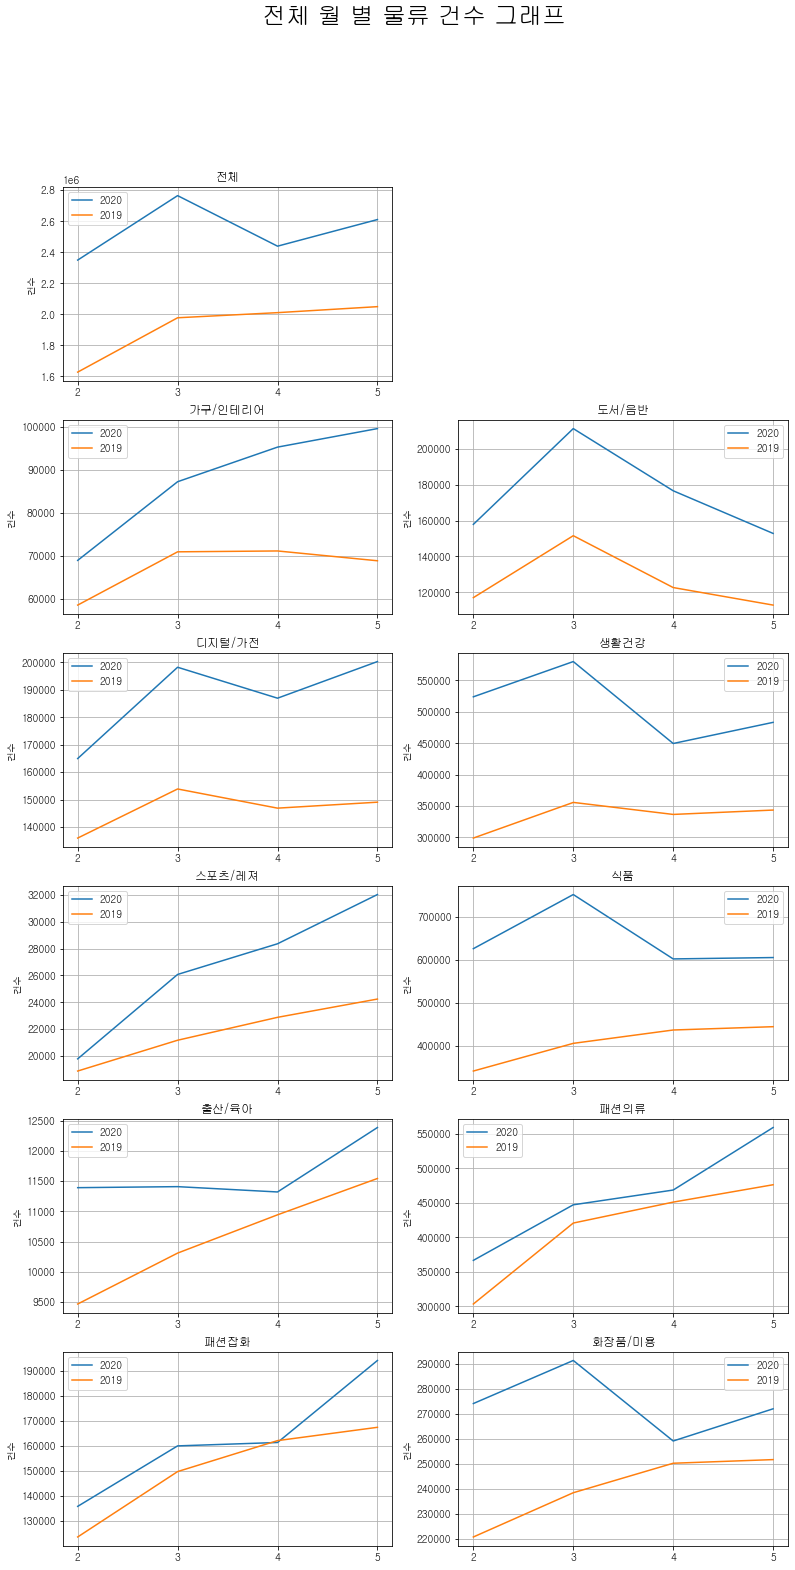

In [22]:
plot_line_graph(None, None)

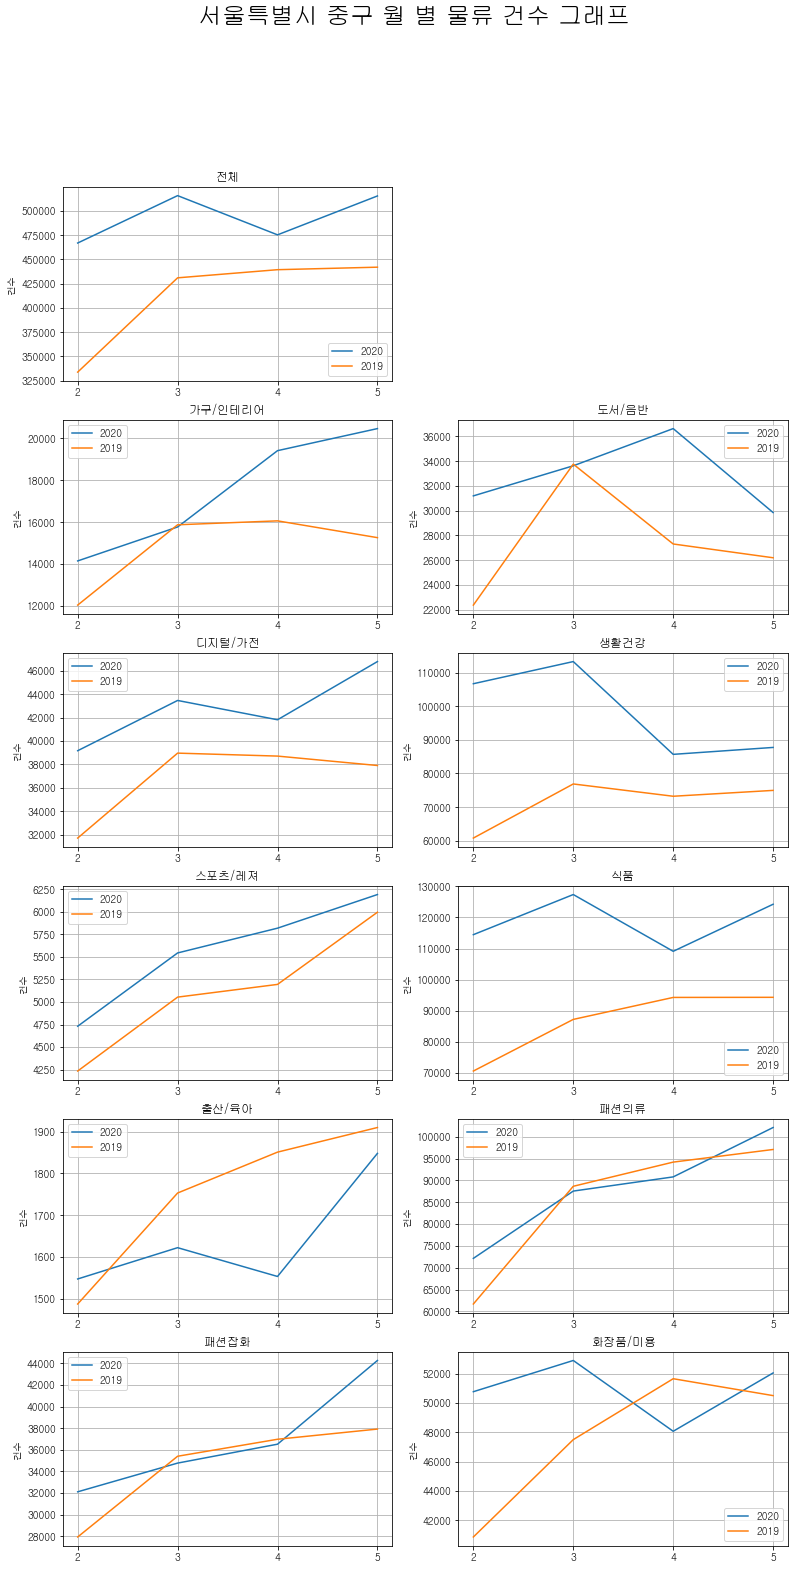

In [23]:
plot_line_graph("서울특별시", "중구")

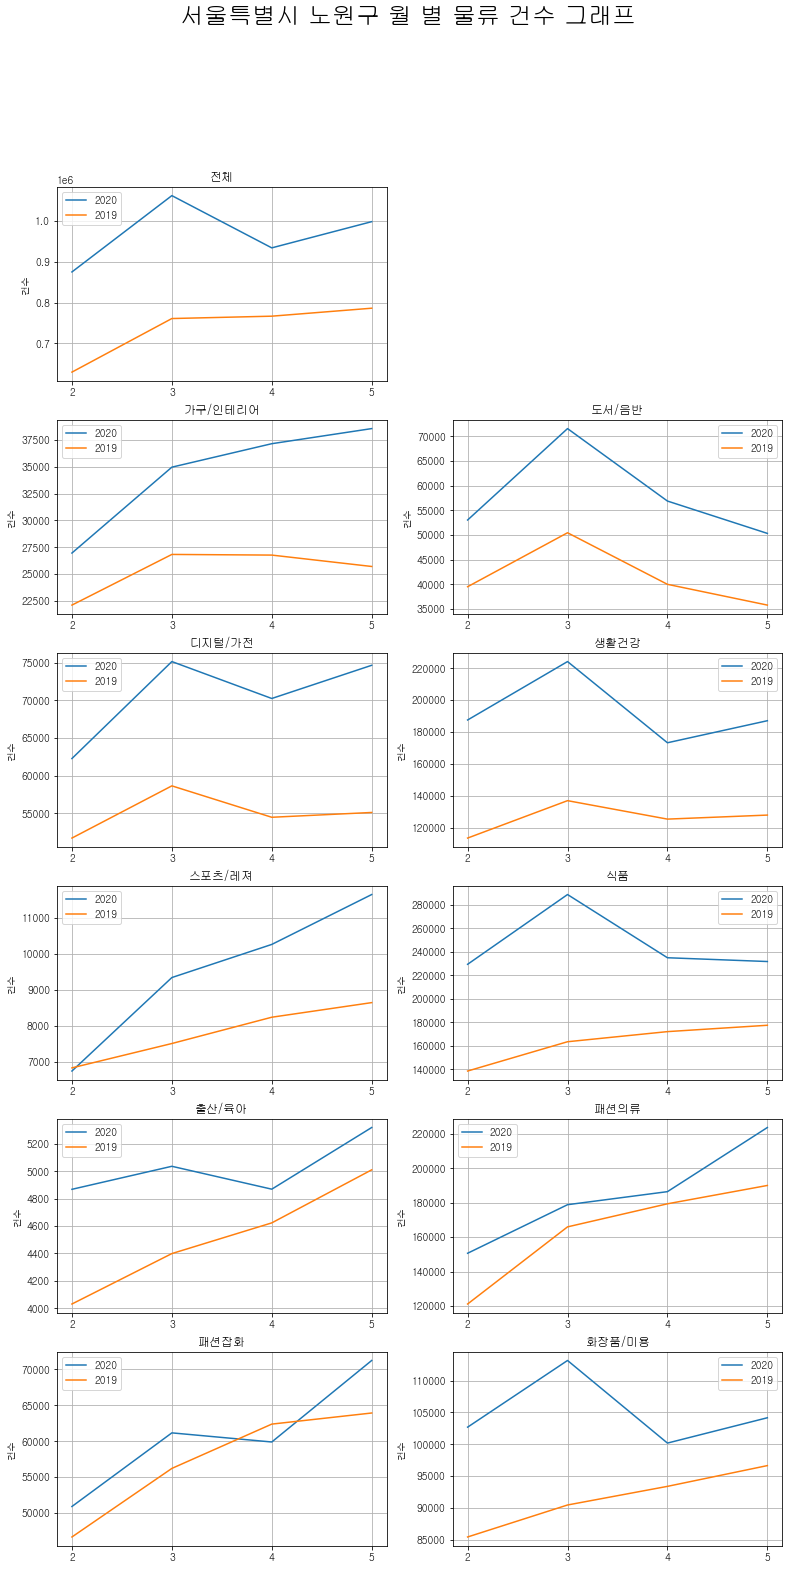

In [24]:
plot_line_graph("서울특별시", "노원구")

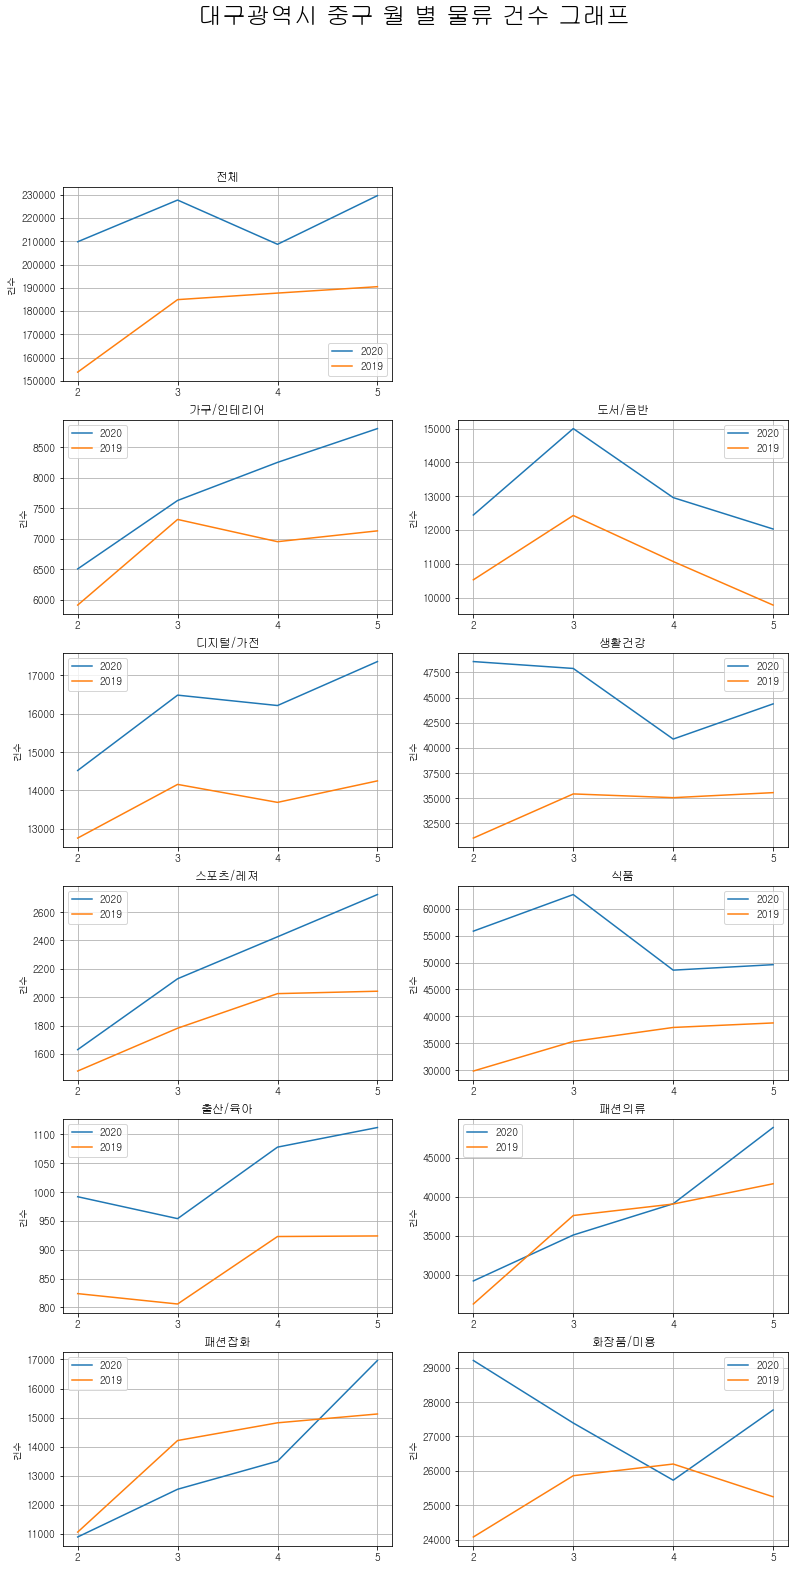

In [25]:
plot_line_graph("대구광역시", "중구")

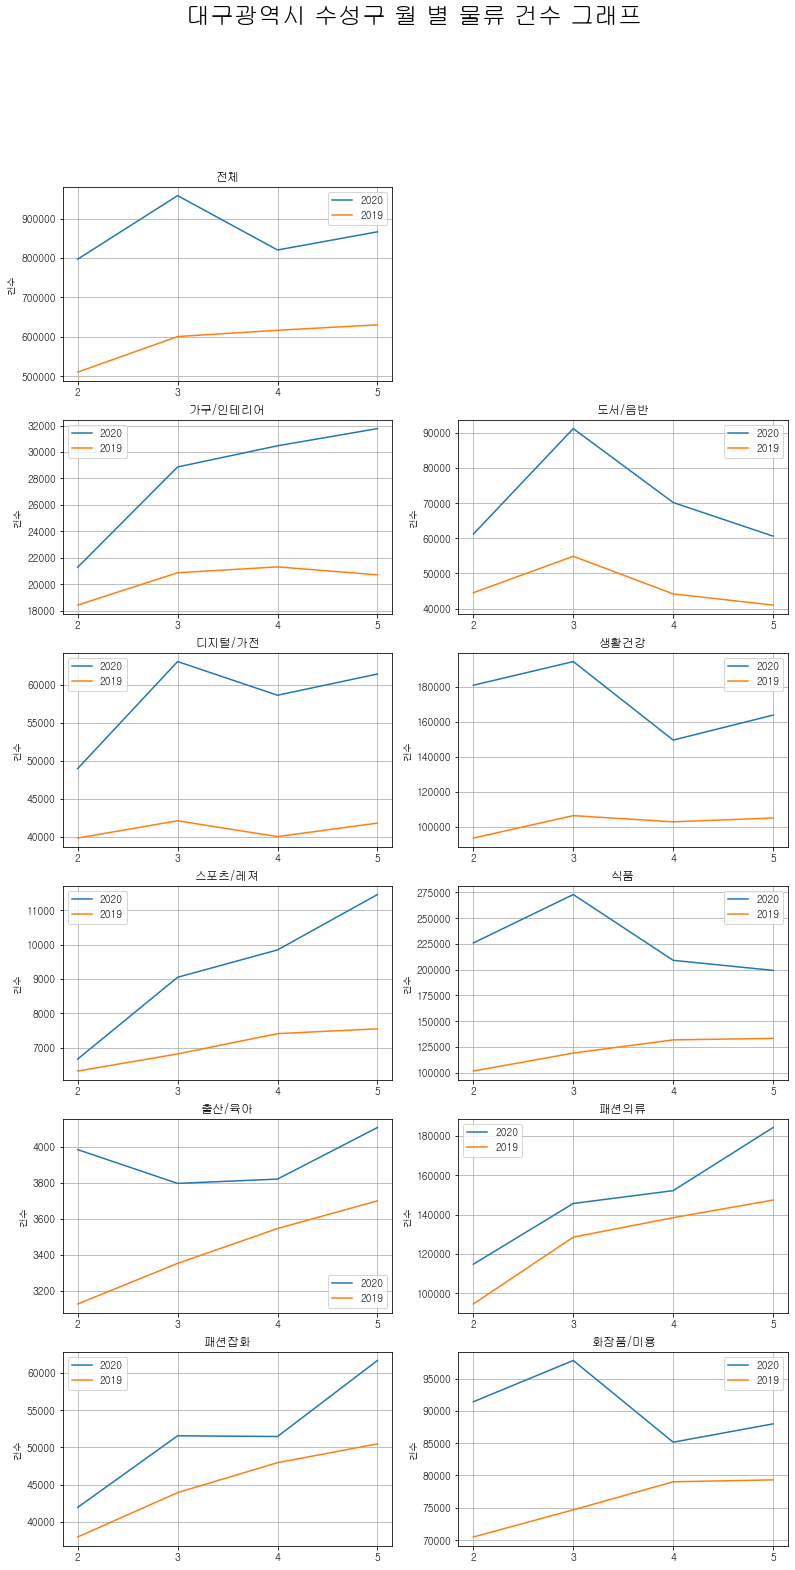

In [26]:
plot_line_graph("대구광역시", "수성구")

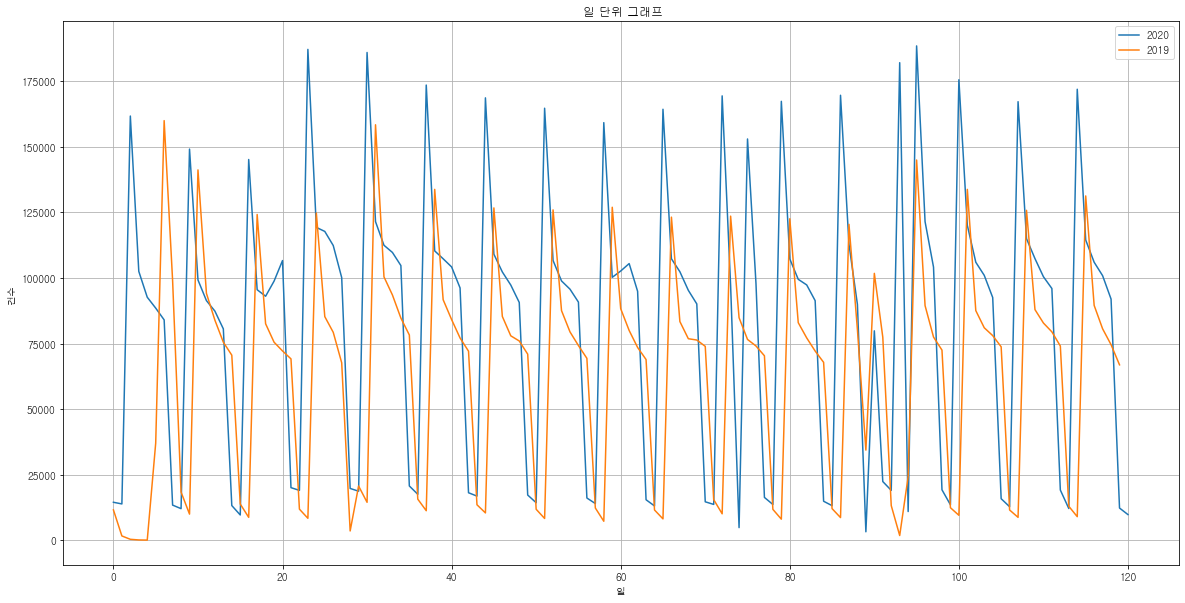

In [27]:
YMD_SUM = stack.groupby("DL_YMD").sum().reset_index()
temp_20 = YMD_SUM[["DL_YMD","INVC_CONT"]].loc[YMD_SUM["DL_YMD"]>200000]
temp_19 = YMD_SUM[["DL_YMD","INVC_CONT"]].loc[YMD_SUM["DL_YMD"]<200000]
day_graph("",121,120)

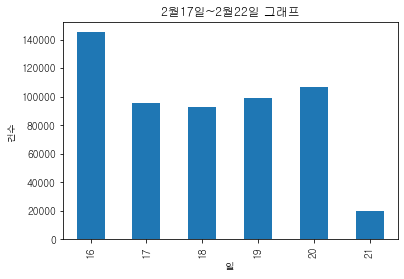

In [28]:
bar_graph(20, 16, 22)

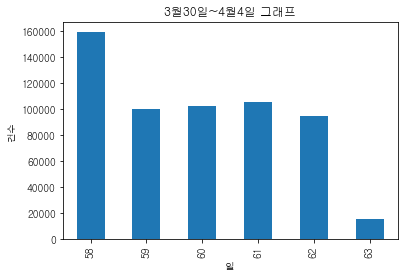

In [29]:
bar_graph(20, 58, 64)

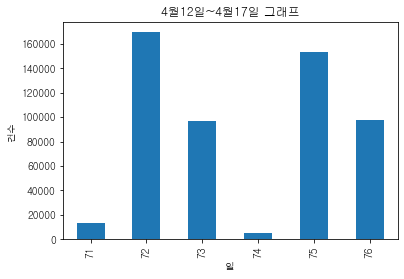

In [30]:
bar_graph(20, 71, 77)

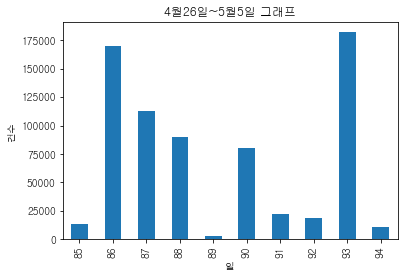

In [31]:
bar_graph(20, 85, 95)

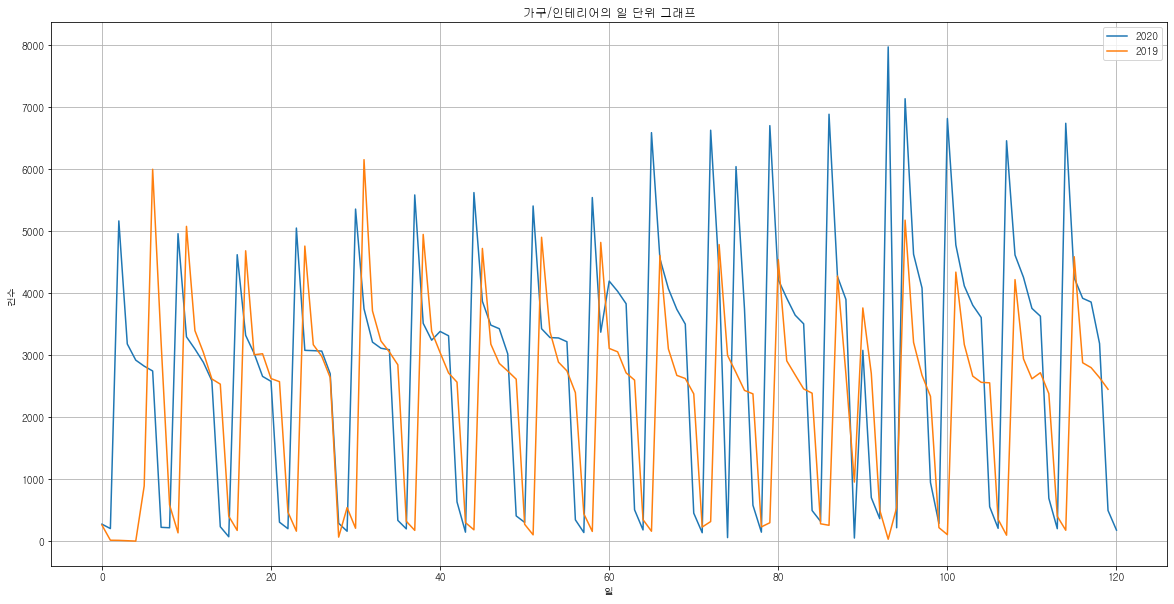

In [32]:
stack_10 = stack.loc[stack["DL_GD_LCLS_CD"] == 10].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_10[["DL_YMD","INVC_CONT"]].loc[stack_10["DL_YMD"]>200000]
temp_19 = stack_10[["DL_YMD","INVC_CONT"]].loc[stack_10["DL_YMD"]<200000]
day_graph("가구/인테리어의",121,120)

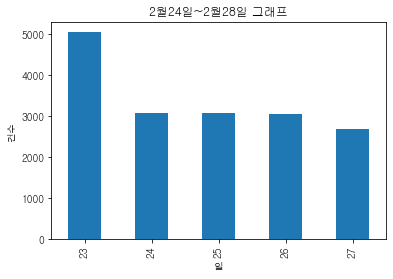

In [33]:
bar_graph(20, 23, 28)

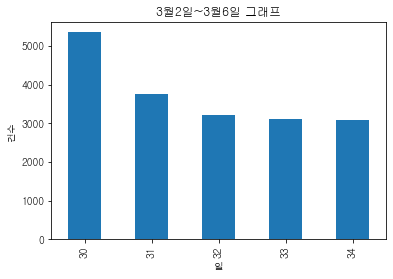

In [34]:
bar_graph(20, 30, 35)

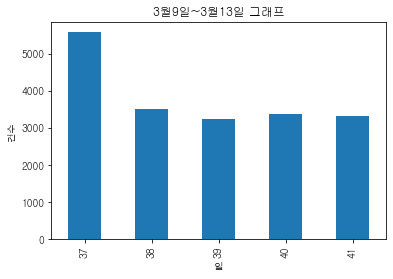

In [35]:
bar_graph(20, 37, 42)

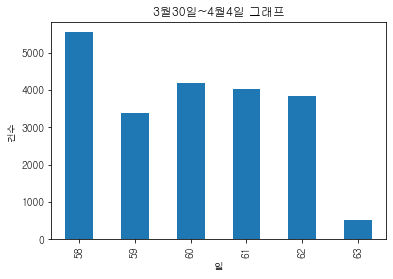

In [36]:
bar_graph(20, 58, 64)

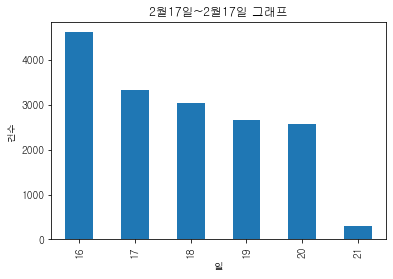

In [37]:
bar_graph(19, 16, 22)

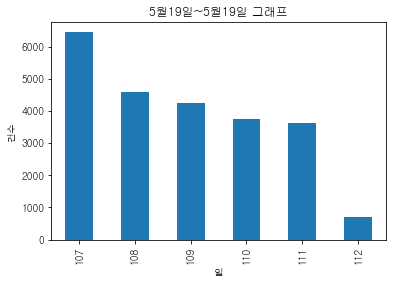

In [38]:
bar_graph(19, 107, 113)

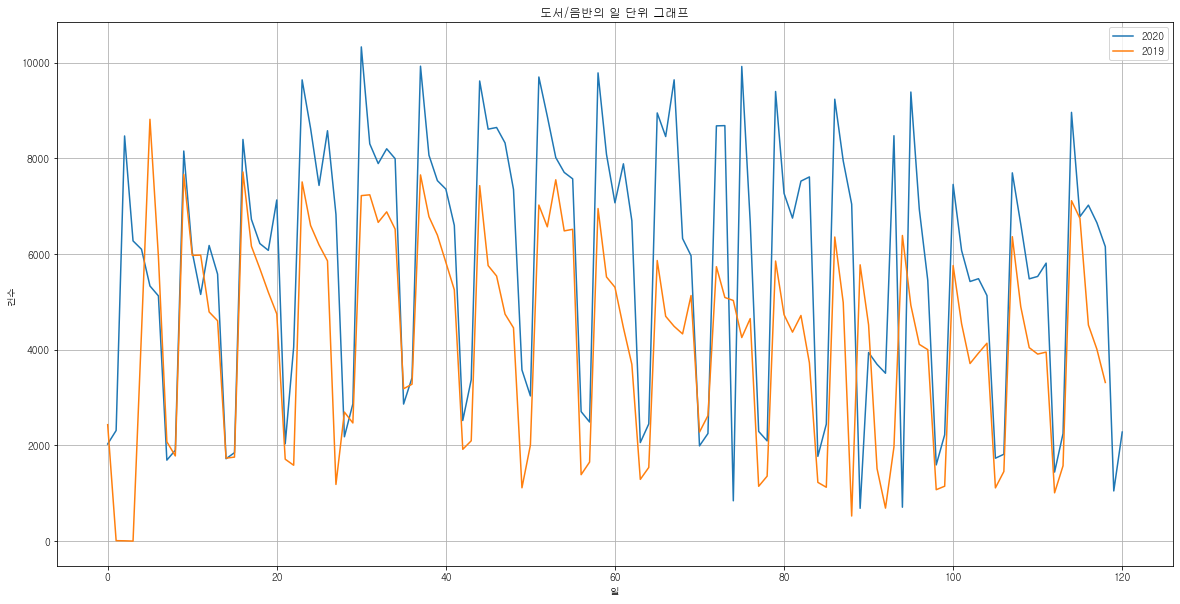

In [39]:
stack_12 = stack.loc[stack["DL_GD_LCLS_CD"] == 12].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_12[["DL_YMD","INVC_CONT"]].loc[stack_12["DL_YMD"]>200000]
temp_19 = stack_12[["DL_YMD","INVC_CONT"]].loc[stack_12["DL_YMD"]<200000]
day_graph("도서/음반의",121,119)

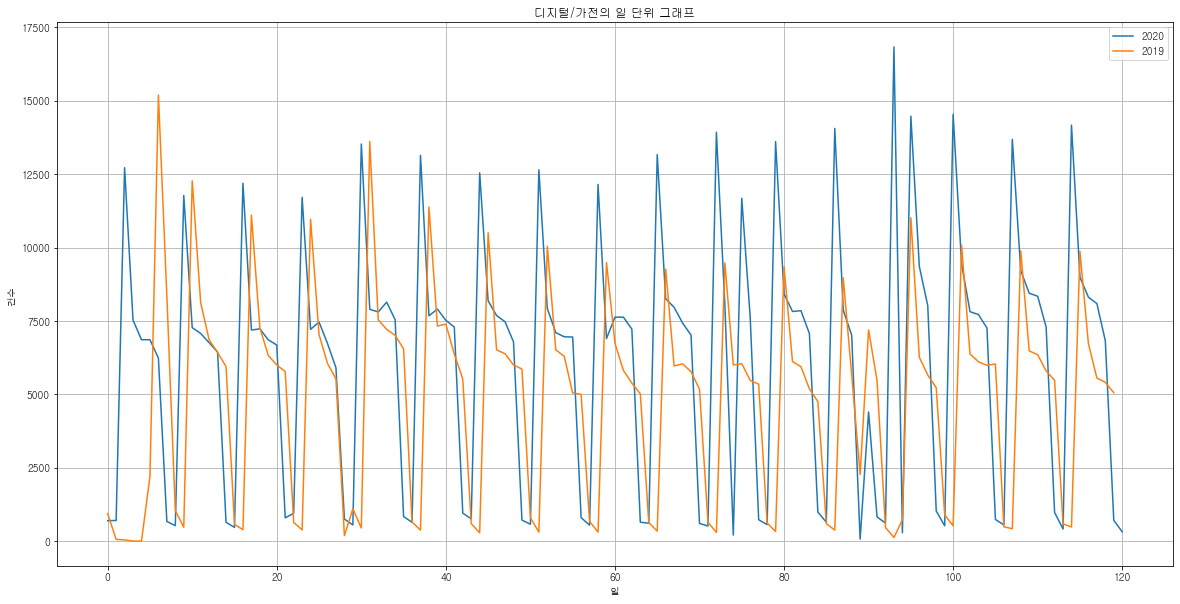

In [40]:
stack_13 = stack.loc[stack["DL_GD_LCLS_CD"] == 13].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_13[["DL_YMD","INVC_CONT"]].loc[stack_13["DL_YMD"]>200000]
temp_19 = stack_13[["DL_YMD","INVC_CONT"]].loc[stack_13["DL_YMD"]<200000]
day_graph("디지털/가전의",121,120)

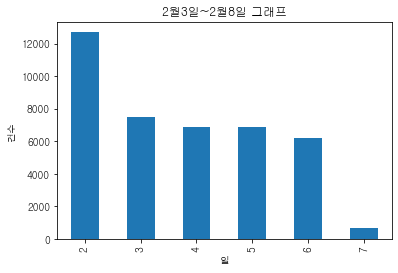

In [41]:
bar_graph(20, 2, 8)

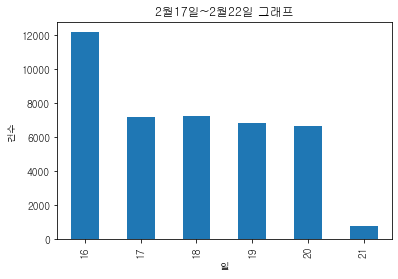

In [42]:
bar_graph(20, 16, 22)

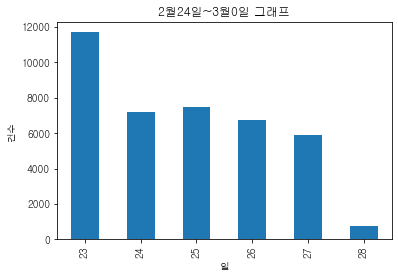

In [43]:
bar_graph(20, 23, 29)

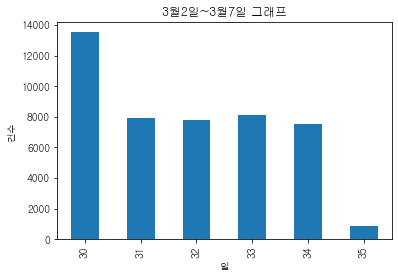

In [44]:
bar_graph(20, 30, 36)

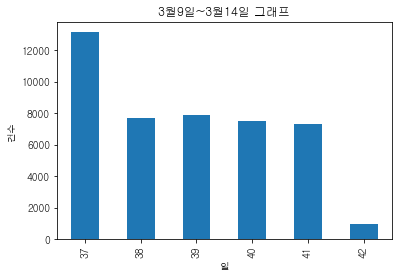

In [45]:
bar_graph(20, 37, 43)

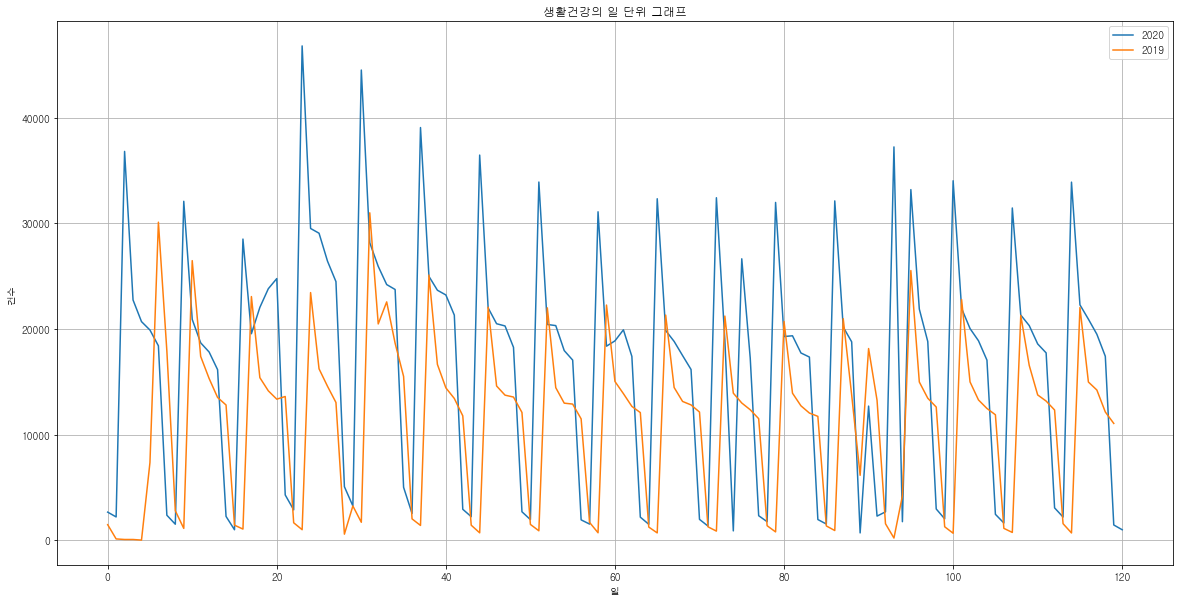

In [46]:
stack_15 = stack.loc[stack["DL_GD_LCLS_CD"] == 15].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_15[["DL_YMD","INVC_CONT"]].loc[stack_15["DL_YMD"]>200000]
temp_19 = stack_15[["DL_YMD","INVC_CONT"]].loc[stack_15["DL_YMD"]<200000]
day_graph("생활건강의",121,120)

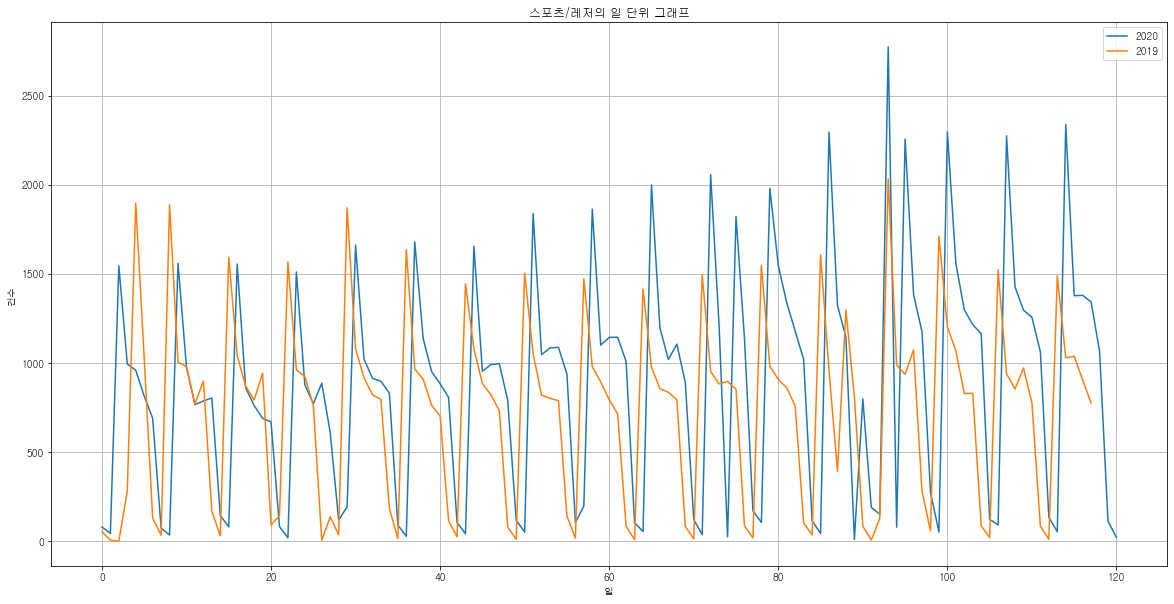

In [47]:
stack_16 = stack.loc[stack["DL_GD_LCLS_CD"] == 16].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_16[["DL_YMD","INVC_CONT"]].loc[stack_16["DL_YMD"]>200000]
temp_19 = stack_16[["DL_YMD","INVC_CONT"]].loc[stack_16["DL_YMD"]<200000]
day_graph("스포츠/레저의",121,118)

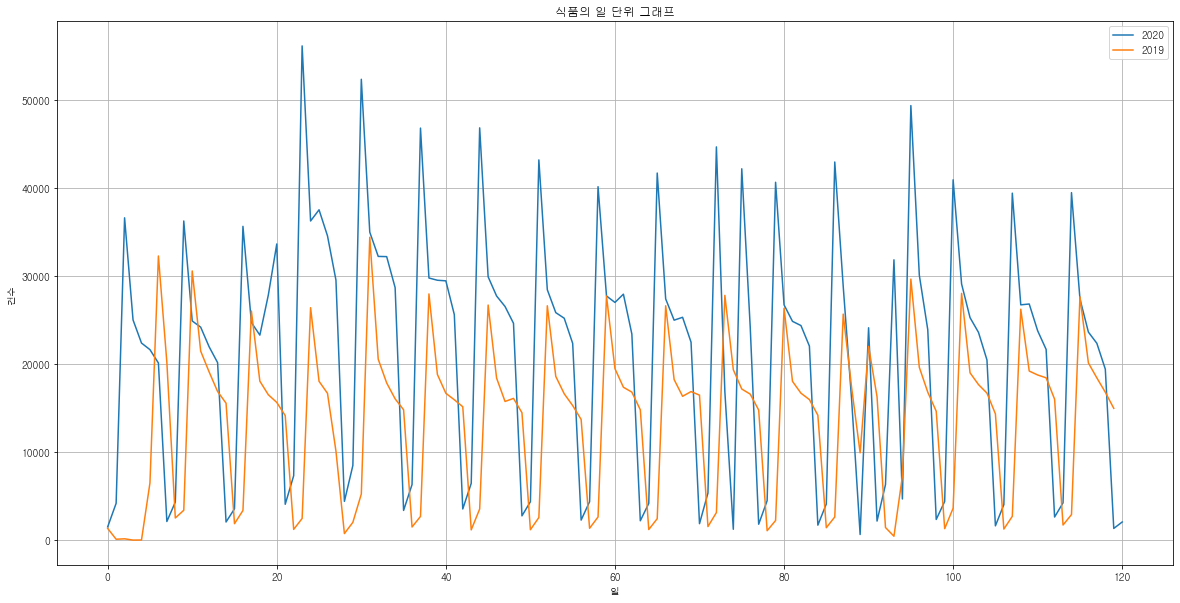

In [48]:
stack_17 = stack.loc[stack["DL_GD_LCLS_CD"] == 17].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_17[["DL_YMD","INVC_CONT"]].loc[stack_17["DL_YMD"]>200000]
temp_19 = stack_17[["DL_YMD","INVC_CONT"]].loc[stack_17["DL_YMD"]<200000]
day_graph("식품의",121,120)

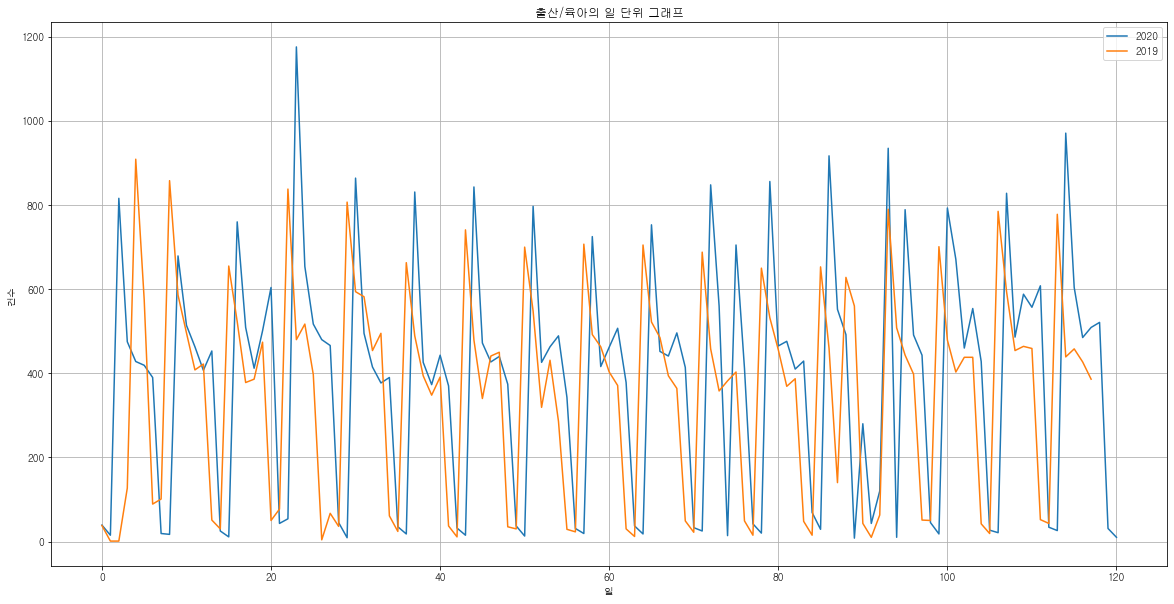

In [49]:
stack_18 = stack.loc[stack["DL_GD_LCLS_CD"] == 18].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_18[["DL_YMD","INVC_CONT"]].loc[stack_18["DL_YMD"]>200000]
temp_19 = stack_18[["DL_YMD","INVC_CONT"]].loc[stack_18["DL_YMD"]<200000]
day_graph("출산/육아의",121,118)

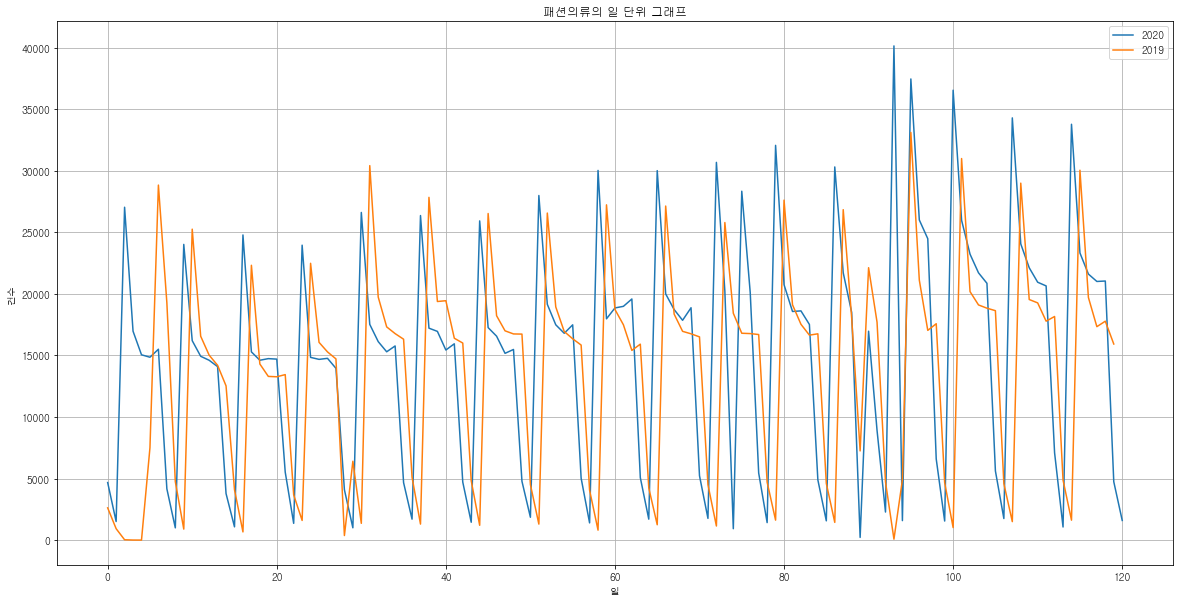

In [50]:
stack_19 = stack.loc[stack["DL_GD_LCLS_CD"] == 19].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_19[["DL_YMD","INVC_CONT"]].loc[stack_19["DL_YMD"]>200000]
temp_19 = stack_19[["DL_YMD","INVC_CONT"]].loc[stack_19["DL_YMD"]<200000]
day_graph("패션의류의",121,120)

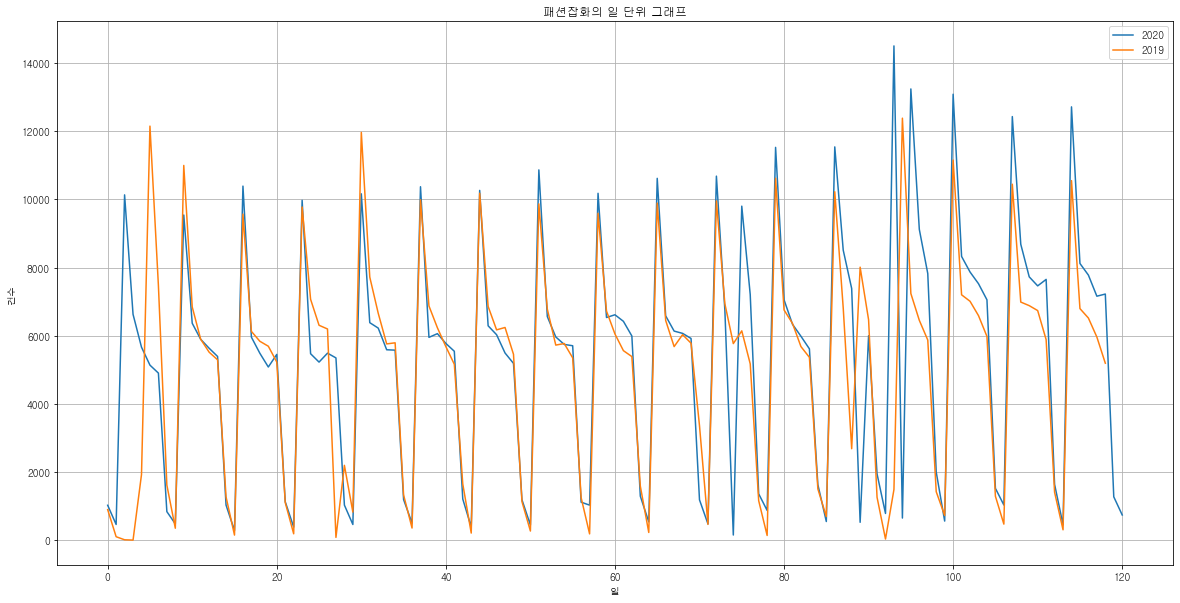

In [51]:
stack_20 = stack.loc[stack["DL_GD_LCLS_CD"] == 20].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_20[["DL_YMD","INVC_CONT"]].loc[stack_20["DL_YMD"]>200000]
temp_19 = stack_20[["DL_YMD","INVC_CONT"]].loc[stack_20["DL_YMD"]<200000]
day_graph("패션잡화의",121,119)

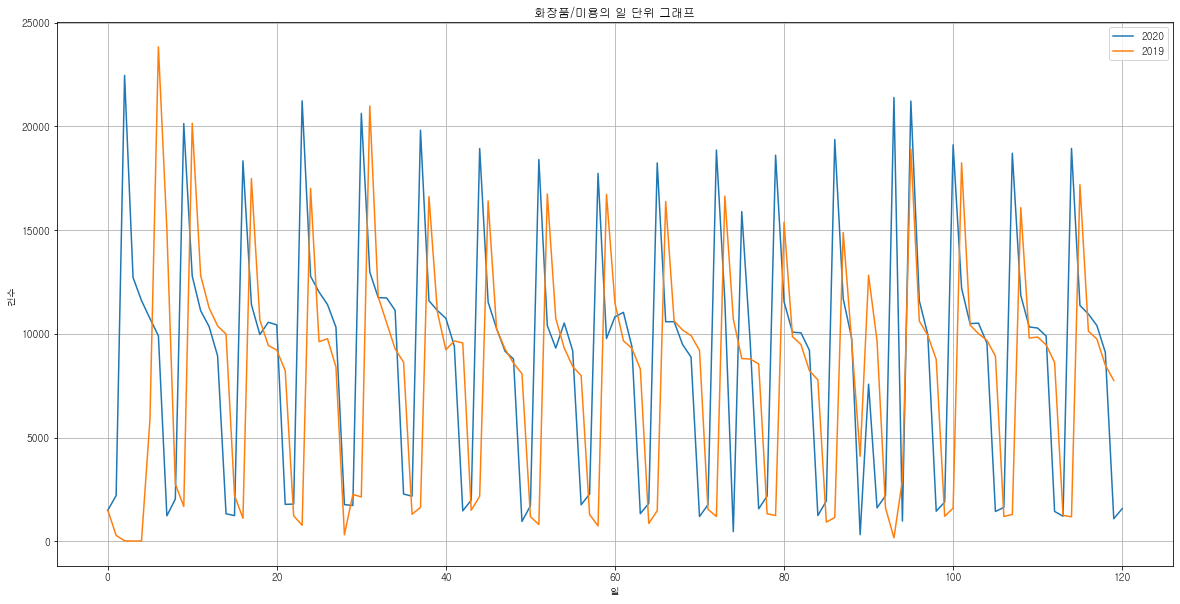

In [52]:
stack_21 = stack.loc[stack["DL_GD_LCLS_CD"] == 21].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_21[["DL_YMD","INVC_CONT"]].loc[stack_21["DL_YMD"]>200000]
temp_19 = stack_21[["DL_YMD","INVC_CONT"]].loc[stack_21["DL_YMD"]<200000]
day_graph("화장품/미용의",121,120)

In [53]:
kt = pd.read_csv("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/kr_regional_daily.csv")

In [54]:
SD_kt = pd.DataFrame(kt.loc[0]).T

for i in range(1, 3492):
    if kt['region'].values[i] == '서울' or kt['region'].values[i] == '대구':
        SD_kt = SD_kt.append(kt.loc[i])
    else:
        continue

temp = SD_kt.sort_values(by=['region','date'])
temp = temp.reset_index(drop=True)
D_kt = temp[0:194]
S_kt = temp[194:].reset_index(drop=True)
S_kt = S_kt.astype({"date" : "int", "confirmed" : "int", "death" : "int", "released" : "int"})
D_kt = D_kt.astype({"date" : "int", "confirmed" : "int", "death" : "int", "released" : "int"})
SD_kt = SD_kt.astype({"date" : "int", "confirmed" : "int", "death" : "int", "released" : "int"})

In [55]:
SD_kt = SD_kt.groupby("date").sum().reset_index()

In [56]:
date_list = list(S_kt["date"])
temp_list = []

for i in range(194):
    if i == 0:
        temp = int(S_kt["confirmed"].loc[S_kt["date"] == date_list[i]])
    else:
        temp = int(S_kt["confirmed"].loc[S_kt["date"] == date_list[i]]) - int(S_kt["confirmed"].loc[S_kt["date"] == date_list[i - 1]])
    temp_list.append(temp)
    
S_daily_confirmed = pd.DataFrame(temp_list)
temp_list = []
    
for i in range(194):
    if i == 0:
        temp = int(D_kt["confirmed"].loc[D_kt["date"] == date_list[i]])
    else:
        temp = int(D_kt["confirmed"].loc[D_kt["date"] == date_list[i]]) - int(D_kt["confirmed"].loc[D_kt["date"] == date_list[i - 1]])
    temp_list.append(temp)

D_daily_confirmed = pd.DataFrame(temp_list)

temp_list = []
    
for i in range(194):
    if i == 0:
        temp = int(SD_kt["confirmed"].loc[SD_kt["date"] == date_list[i]])
    else:
        temp = int(SD_kt["confirmed"].loc[D_kt["date"] == date_list[i]]) - int(SD_kt["confirmed"].loc[SD_kt["date"] == date_list[i - 1]])
    temp_list.append(temp)

SD_daily_confirmed = pd.DataFrame(temp_list)

In [57]:
S_kt = pd.concat([S_kt, S_daily_confirmed], axis = 1)
D_kt = pd.concat([D_kt, D_daily_confirmed], axis = 1)
SD_kt = pd.concat([SD_kt, SD_daily_confirmed], axis = 1)

In [58]:
S_kt["DL_YM"] = S_kt["date"].map(lambda x : x // 100)
D_kt["DL_YM"] = D_kt["date"].map(lambda x : x // 100)
SD_kt["DL_YM"] = SD_kt["date"].map(lambda x : x // 100)

In [59]:
S_kt = S_kt.groupby("DL_YM").sum().reset_index()
D_kt = D_kt.groupby("DL_YM").sum().reset_index()
SD_kt = SD_kt.groupby("DL_YM").sum().reset_index()

In [60]:
S_kt = S_kt[:4]

In [61]:
S_kt = S_kt[0]

In [62]:
S_kt_scaled = minmax_scale(S_kt, axis = 0, copy = True)

In [63]:
S_kt_scaled = pd.DataFrame(S_kt_scaled)

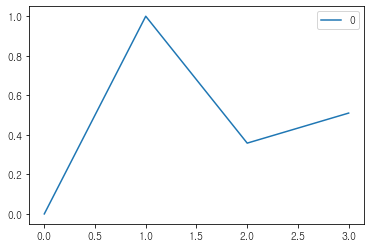

In [64]:
S_kt_scaled.plot()

In [65]:
D_kt = D_kt[:4]

In [66]:
D_kt = D_kt[0]

In [67]:
D_kt_scaled = minmax_scale(D_kt, axis = 0, copy = True)

In [68]:
D_kt_scaled = pd.DataFrame(D_kt_scaled)

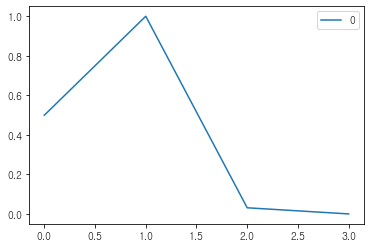

In [69]:
D_kt_scaled.plot()

In [70]:
SD_kt = SD_kt[:4]

In [71]:
SD_kt = SD_kt[0]

In [72]:
SD_kt_scaled = minmax_scale(SD_kt, axis = 0, copy = True)

In [73]:
SD_kt_scaled = pd.DataFrame(SD_kt_scaled)

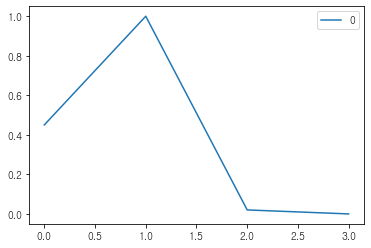

In [74]:
SD_kt_scaled.plot()

In [75]:
def plot_scaled_line_graph(x, y):    
    stack_num_list = list(stack_info_2["상품대분류코드"].values)
    stack_name_list = list(stack_info_2["상품대분류명"].values)
    cnt = 0
    fig = plt.figure(figsize=(13, 25))
    
    if ((x == None) & (y == None)):
        temp = stack
        fig.suptitle("전체 월 별 물류 건수 스케일링 그래프", fontsize = 24)
        
    else:
        temp = stack.loc[(stack["CTPV_NM"] == x) & (stack["CTGG_NM"] == y)]
        fig.suptitle(x+" "+y+" 월 별 물류 건수 스케일링 그래프", fontsize = 24)
    
    for i in range(12):
        if i == 1:
            continue
        
        else:
            fig.add_subplot(6,2,(i+1))
        
        if i == 0:
            YM_SUM = temp.groupby("DL_YM").sum().reset_index()
            plt.title("전체")
        
        elif i == 1:
            continue
        
        else:
            YM_SUM = temp.loc[stack["DL_GD_LCLS_CD"] == stack_num_list[cnt]].groupby("DL_YM").sum().reset_index()
            plt.title(stack_name_list[cnt])
            cnt += 1
        
        temp_20 = YM_SUM[["INVC_CONT"]].loc[YM_SUM["DL_YM"]>2000]
        temp_20_scaled = pd.DataFrame(minmax_scale(temp_20, axis = 0, copy = True))
        plt.plot(temp_20_scaled)
        plt.grid(b=None, which='major', axis="both")
    
    plt.show()

# plt.sactter(x, y)

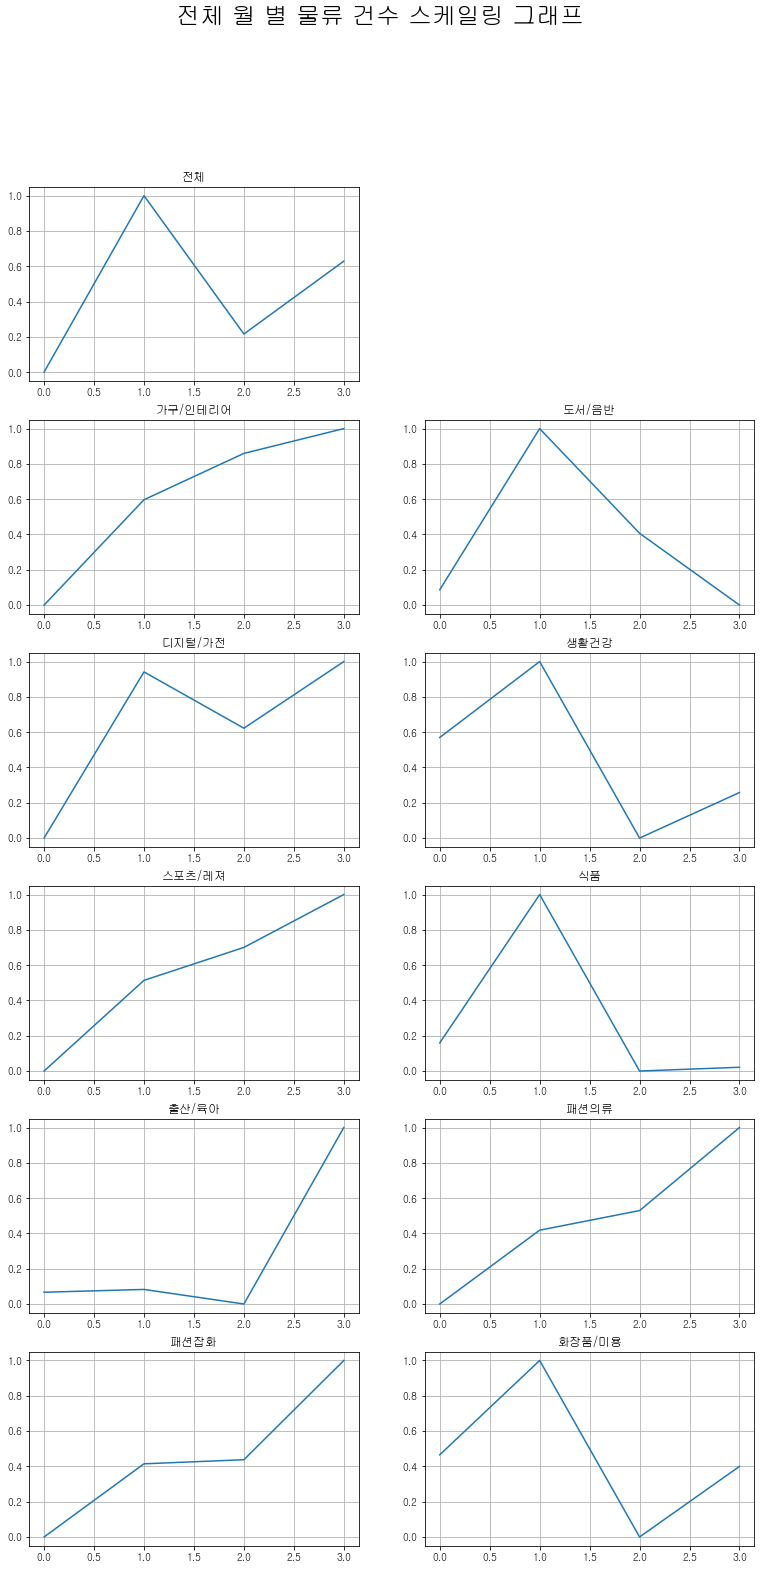

In [76]:
plot_scaled_line_graph(None, None)

# 테스트, 트레인

In [77]:
temp = stack.loc[stack["DL_Y"] == 20]
temp = temp.groupby("DL_YMD").sum().reset_index()
stack_day_sum = temp[["DL_YMD", "INVC_CONT"]]

In [78]:
DL_YMD_list = list(stack_day_sum["DL_YMD"])
week_list = []

for i in DL_YMD_list:
    date = i % 10000
    x = date // 100
    y = date % 100
    week_list.append(getDayName(x, y))
    
stack_day_sum["week"] = week_list

c:\miniconda3\envs\dobby\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [79]:
stack_day_sum

,DL_YMD,INVC_CONT,week
0,200201,14490,5
1,200202,13857,6
2,200203,161764,0
3,200204,102531,1
4,200205,92676,2
...,...,...,...
116,200527,106021,2
117,200528,100891,3
118,200529,91972,4
119,200530,12289,5


In [80]:
kt = kt.loc[(kt["region"] == "서울") | (kt["region"] == "대구")].reset_index(drop = True)

In [81]:
confirmed_list = list(kt["confirmed"])
new_list = []

for i in range (388):
    if (i == 0) | (i == 1):
        temp = confirmed_list[i]
        
    else:
        temp = confirmed_list[i] - confirmed_list[(i - 2)]
        
    new_list.append(temp)

In [82]:
kt["new"] = new_list
temp = kt.groupby("date").sum().reset_index()
temp["DL_YMD"] = temp["date"].map(lambda x : x % 1000000)
kt_day_sum = temp[["DL_YMD", "new"]]

In [83]:
DL_YMD_list = list(kt_day_sum["DL_YMD"])
week_list = []

for i in DL_YMD_list:
    date = i % 10000
    x = date // 100
    y = date % 100
    week_list.append(getDayName(x, y))
    
kt_day_sum["week"] = week_list

c:\miniconda3\envs\dobby\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [84]:
kt_day_sum

,DL_YMD,new,week
0,200217,14,0
1,200218,1,1
2,200219,16,2
3,200220,21,3
4,200221,85,4
...,...,...,...
189,200824,97,0
190,200825,139,1
191,200826,115,2
192,200827,167,3


In [85]:
X_train, X_test = train_test_split(stack_day_sum, random_state = 0)

In [86]:
y_train, y_test = train_test_split(kt_day_sum, random_state = 0)

In [87]:
X_train.shape

(90, 3)

In [88]:
X_test.shape

(31, 3)

In [89]:
y_train.shape

(145, 3)

In [90]:
y_test.shape

(49, 3)

# 츄라이

In [91]:
sales = pd.read_csv("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt", sep = "\t")

In [92]:
temp = sales.loc[sales["STD_DD"] > 20200000]

In [93]:
temp = temp.groupby("STD_DD").sum().reset_index()

In [94]:
sales_20_sum = temp[16:]

In [95]:
count = 0
stack_cd = list(stack_info_2["상품대분류코드"])
culmn_nm_list = list(stack_info_2["상품대분류명"])
stack_20Y = stack.loc[stack["DL_Y"] == 20]
cnpz = kt_day_sum[:105]

for i in stack_cd:
    temp = stack_20Y.loc[stack["DL_GD_LCLS_CD"] == i].groupby("DL_YMD").sum().reset_index()
    temp = temp[["INVC_CONT"]][16:].reset_index(drop = True)
    cnpz[culmn_nm_list[count]] = list(temp["INVC_CONT"])
    count += 1

c:\miniconda3\envs\dobby\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\miniconda3\envs\dobby\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\miniconda3\envs\dobby\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [96]:
cnpz["총이용금액"] = list(sales_20_sum["USE_AMT"])

c:\miniconda3\envs\dobby\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
stack

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y,CODE
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,1902,19,190201121114665
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,1902,19,190201101114615
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,1902,19,190201102711565
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,1902,19,190201122711650
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,1902,19,190201132726690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,2005,20,200531192726662
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,2005,20,200531191114635
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,2005,20,200531202726662
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,2005,20,200531201135695


In [126]:
stack.groupby(['DL_YMD','DL_GD_LCLS_NM']).sum().reset_index()[['DL_YMD','DL_GD_LCLS_NM','INVC_CONT']].T

,0,1,2,3,4,5,6,7,8,9,...,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403
DL_YMD,190201,190201,190201,190201,190201,190201,190201,190201,190201,190201,...,200531,200531,200531,200531,200531,200531,200531,200531,200531,200531
DL_GD_LCLS_NM,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,...,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
INVC_CONT,262,2434,935,1483,53,1336,38,2618,897,1519,...,180,2280,319,1001,21,2068,10,1597,740,1574


In [97]:
cnpz

,DL_YMD,new,week,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레져,식품,출산/육아,패션의류,패션잡화,화장품/미용,총이용금액
0,200217,14,0,4623,8395,12188,28525,1556,35626,760,24780,10392,18343,23699621
1,200218,1,1,3322,6725,7192,19564,861,24706,509,15284,5959,11410,24861374
2,200219,16,2,3032,6219,7231,22057,762,23279,412,14607,5486,9968,24730948
3,200220,21,3,2660,6077,6855,23824,690,27826,501,14737,5083,10559,24219364
4,200221,85,4,2580,7130,6682,24784,670,33625,604,14697,5453,10433,24995464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,200527,22,2,3920,7022,8310,20941,1380,23622,485,21604,7780,10957,32336892
101,200528,26,3,3859,6656,8094,19514,1343,22348,509,21004,7161,10403,31234479
102,200529,20,4,3189,6155,6827,17426,1066,19415,521,21039,7224,9110,33423717
103,200530,11,5,497,1049,711,1454,112,1335,31,4741,1273,1086,36839397


In [98]:
X = cnpz[cnpz.columns[1:13]]

In [99]:
y = cnpz["총이용금액"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression().fit(X_train, y_train)

In [103]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.71


In [104]:
from sklearn.linear_model import Ridge

In [105]:
ridge = Ridge().fit(X_train, y_train)

In [106]:
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.71


In [107]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

In [108]:
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.71


In [109]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

In [110]:
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.71


In [111]:
from sklearn.linear_model import Lasso

In [112]:
lasso = Lasso().fit(X_train, y_train)

c:\miniconda3\envs\dobby\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303553308166834.1, tolerance: 183057746334.8208
  positive)


In [113]:
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.72
사용한 특성의 개수 12


In [114]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)

In [115]:
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.71
사용한 특성의 개수 12


In [116]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

In [117]:
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.71
사용한 특성의 개수 12
